In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

import seaborn as sns

In [2]:
operaciones = pd.read_csv('operaciones_bancarias.csv')

In [3]:
operaciones

,nro_de_transacción,tipo_de_transacción,cuenta_origen,cuenta_destino,fecha,hora,monto
0,12745,pago,1234567890,7685764563,10/12/2019,22:02,6200.00
1,46759,debito,1762345234,909873452,17/08/2019,10:35,3345.50
2,367485,pago,1982342323,1231221212,01/04/2019,14:22,3465.65
3,109456,debito,2121212121,7689565758,17/08/2019,11:31,12067.45
4,578354,transferencia,4567345987,9898078695,11/14/2019,13:54,45678.00
5,698470,pago,1252387690,2627384955,22/11/2019,14:16,34523.32
6,908745,debito,1265656578,9367458354,22/11/2019,10:35,600.43
7,152431,debito,1231222223,2783523412,03/03/2018,11:20,90.23
8,111873,pago,1265656578,3674598234,17/08/2019,17:01,1800.00
9,187745,transferencia,7456453243,1238876670,03/01/2020,02:21,2100.50


In [4]:
#chequeamos que no haya operaciones nulas
operaciones['tipo_de_transacción'].isnull().values.any()

False

In [5]:
#otra foram de chequear que no haya operaciones nulas es viendo que cantidad de operaciones nulas hay
operaciones ['tipo_de_transacción'].isnull().sum()

0

In [6]:
transferencias = operaciones[operaciones['tipo_de_transacción']=='transferencia']

In [7]:
transferencias

,nro_de_transacción,tipo_de_transacción,cuenta_origen,cuenta_destino,fecha,hora,monto
4,578354,transferencia,4567345987,9898078695,11/14/2019,13:54,45678.00
9,187745,transferencia,7456453243,1238876670,03/01/2020,02:21,2100.50
10,833654,transferencia,982563456,6786784324,01/05/2020,06:20,2345.33
11,444446,transferencia,2673451209,6554433221,11/14/2019,09:09,999.34
14,152341,transferencia,1265879854,4567345987,11/14/2019,18:34,600.43
19,946372,transferencia,6786784324,1890987256,03/03/2018,23:21,122.00
20,909065,transferencia,6786784324,5678453244,17/08/2019,10:49,122.01
24,784456,transferencia,1111115467,1234567890,06/07/2017,16:30,500.50
27,121234,transferencia,3456345129,4567345987,11/14/2019,18:30,345.56


In [8]:
pagos = operaciones [operaciones['tipo_de_transacción']=='pago']
pagos

,nro_de_transacción,tipo_de_transacción,cuenta_origen,cuenta_destino,fecha,hora,monto
0,12745,pago,1234567890,7685764563,10/12/2019,22:02,6200.00
2,367485,pago,1982342323,1231221212,01/04/2019,14:22,3465.65
5,698470,pago,1252387690,2627384955,22/11/2019,14:16,34523.32
8,111873,pago,1265656578,3674598234,17/08/2019,17:01,1800.00
12,925338,pago,987876876,4567345987,22/11/2019,11:20,122.22
15,188729,pago,1223344556,1234567890,10/12/2019,10:35,1800.00
16,199982,pago,998766554,2673451209,10/12/2019,10:35,1800.00
17,145222,pago,2121212121,1265656578,22/11/2019,19:05,1800.00
22,567567,pago,7777888880,1234567890,22/11/2019,14:58,1800.00
23,934523,pago,1231222223,2255667733,17/08/2019,15:15,1800.00


In [9]:
debitos = operaciones[operaciones['tipo_de_transacción']=='debito']
debitos

,nro_de_transacción,tipo_de_transacción,cuenta_origen,cuenta_destino,fecha,hora,monto
1,46759,debito,1762345234,909873452,17/08/2019,10:35,3345.50
3,109456,debito,2121212121,7689565758,17/08/2019,11:31,12067.45
6,908745,debito,1265656578,9367458354,22/11/2019,10:35,600.43
7,152431,debito,1231222223,2783523412,03/03/2018,11:20,90.23
13,909091,debito,2121212121,9090878765,17/08/2019,18:43,45.50
18,783333,debito,3467891123,3467891123,01/09/2018,22:06,90.23


In [10]:
otros = operaciones[operaciones['tipo_de_transacción']=='otros']
otros

,nro_de_transacción,tipo_de_transacción,cuenta_origen,cuenta_destino,fecha,hora,monto
21,345634,otros,6666453478,6554433221,10/12/2019,12:33,0.30
25,125666,otros,6666453478,5555555557,10/12/2019,17:30,22.23


In [11]:
transferencias

,nro_de_transacción,tipo_de_transacción,cuenta_origen,cuenta_destino,fecha,hora,monto
4,578354,transferencia,4567345987,9898078695,11/14/2019,13:54,45678.00
9,187745,transferencia,7456453243,1238876670,03/01/2020,02:21,2100.50
10,833654,transferencia,982563456,6786784324,01/05/2020,06:20,2345.33
11,444446,transferencia,2673451209,6554433221,11/14/2019,09:09,999.34
14,152341,transferencia,1265879854,4567345987,11/14/2019,18:34,600.43
19,946372,transferencia,6786784324,1890987256,03/03/2018,23:21,122.00
20,909065,transferencia,6786784324,5678453244,17/08/2019,10:49,122.01
24,784456,transferencia,1111115467,1234567890,06/07/2017,16:30,500.50
27,121234,transferencia,3456345129,4567345987,11/14/2019,18:30,345.56


In [13]:
transferencias['cuenta_origen'].isnull().values.any()

False

In [14]:
transferencias['cuenta_destino'].isnull().values.any()

False

In [22]:
transferencias.describe()

,nro_de_transacción,cuenta_origen,cuenta_destino,monto
count,9.000000,9.000000e+00,9.000000e+00,9.000000
mean,550851.888889,3.898525e+09,4.712986e+09,5868.185556
std,336639.339116,2.614620e+09,2.908690e+09,14950.881331
min,121234.000000,9.825635e+08,1.234568e+09,122.000000
25%,187745.000000,1.265880e+09,1.890987e+09,345.560000
50%,578354.000000,3.456345e+09,4.567346e+09,600.430000
75%,833654.000000,6.786784e+09,6.554433e+09,2100.500000
max,946372.000000,7.456453e+09,9.898079e+09,45678.000000


In [30]:
#chequeamos la cantidad de 'transferencias' que registran montos nulos o negativos
transferencias[transferencias['monto']<=0].count()

nro_de_transacción     0
tipo_de_transacción    0
cuenta_origen          0
cuenta_destino         0
fecha                  0
hora                   0
monto                  0
dtype: int64

In [31]:
#chequeamos la cantidad de 'transferencias' que registran montos manyores a cero
transferencias[transferencias['monto']>0].count()

nro_de_transacción     9
tipo_de_transacción    9
cuenta_origen          9
cuenta_destino         9
fecha                  9
hora                   9
monto                  9
dtype: int64

In [33]:
#muestra las primeras 5 operaciones
operaciones.loc[0:5,]

,nro_de_transacción,tipo_de_transacción,cuenta_origen,cuenta_destino,fecha,hora,monto
0,12745,pago,1234567890,7685764563,10/12/2019,22:02,6200.00
1,46759,debito,1762345234,909873452,17/08/2019,10:35,3345.50
2,367485,pago,1982342323,1231221212,01/04/2019,14:22,3465.65
3,109456,debito,2121212121,7689565758,17/08/2019,11:31,12067.45
4,578354,transferencia,4567345987,9898078695,11/14/2019,13:54,45678.00
5,698470,pago,1252387690,2627384955,22/11/2019,14:16,34523.32


In [38]:
#mostramos las 10 operaciones de mayores montos
operaciones.sort_values('monto', ascending = False).head(10)

,nro_de_transacción,tipo_de_transacción,cuenta_origen,cuenta_destino,fecha,hora,monto
4,578354,transferencia,4567345987,9898078695,11/14/2019,13:54,45678.00
5,698470,pago,1252387690,2627384955,22/11/2019,14:16,34523.32
3,109456,debito,2121212121,7689565758,17/08/2019,11:31,12067.45
0,12745,pago,1234567890,7685764563,10/12/2019,22:02,6200.00
2,367485,pago,1982342323,1231221212,01/04/2019,14:22,3465.65
1,46759,debito,1762345234,909873452,17/08/2019,10:35,3345.50
10,833654,transferencia,982563456,6786784324,01/05/2020,06:20,2345.33
9,187745,transferencia,7456453243,1238876670,03/01/2020,02:21,2100.50
16,199982,pago,998766554,2673451209,10/12/2019,10:35,1800.00
23,934523,pago,1231222223,2255667733,17/08/2019,15:15,1800.00


In [42]:
operaciones['tipo_de_transacción'].describe()

count       29
unique       4
top       pago
freq        12
Name: tipo_de_transacción, dtype: object

In [43]:
operaciones_short = operaciones[['tipo_de_transacción', 'monto']]
operaciones_short

,tipo_de_transacción,monto
0,pago,6200.00
1,debito,3345.50
2,pago,3465.65
3,debito,12067.45
4,transferencia,45678.00
5,pago,34523.32
6,debito,600.43
7,debito,90.23
8,pago,1800.00
9,transferencia,2100.50


In [48]:
operaciones_short.groupby(['tipo_de_transacción']).mean()

,monto
tipo_de_transacción,
debito,2706.556667
otros,11.265000
pago,4688.065833
transferencia,5868.185556


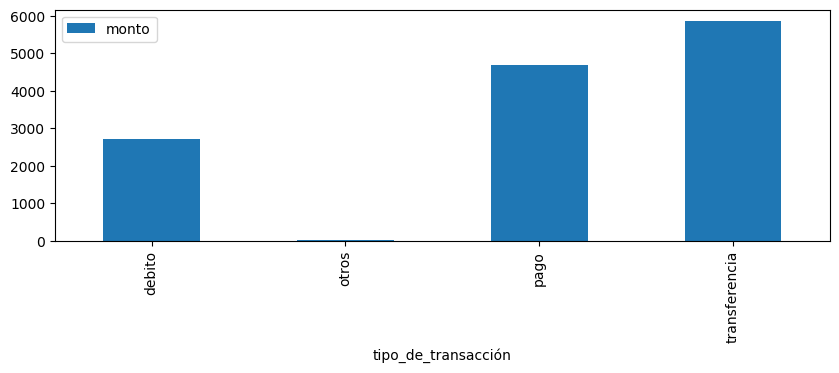

In [53]:
#grafico de barras de promedio para cada operacion
plt.rcParams['figure.figsize'] = (10, 3)
operaciones_short.groupby(['tipo_de_transacción']).mean().plot(kind='bar')

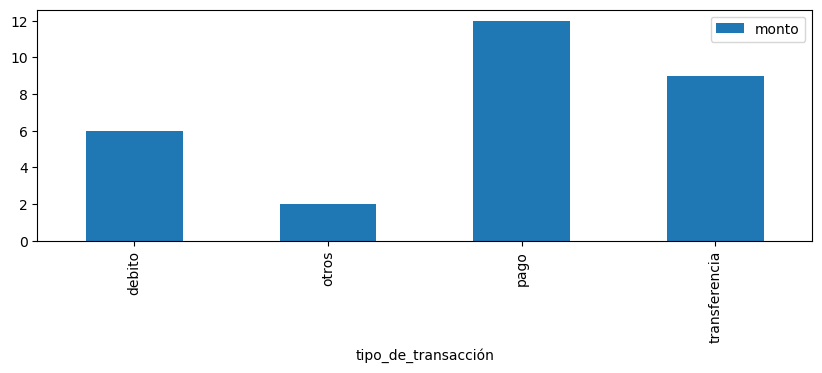

In [54]:
#grafico de barras de cantidad de transacciones para cada tipo de operacion
operaciones_short.groupby(['tipo_de_transacción']).count().plot(kind='bar')

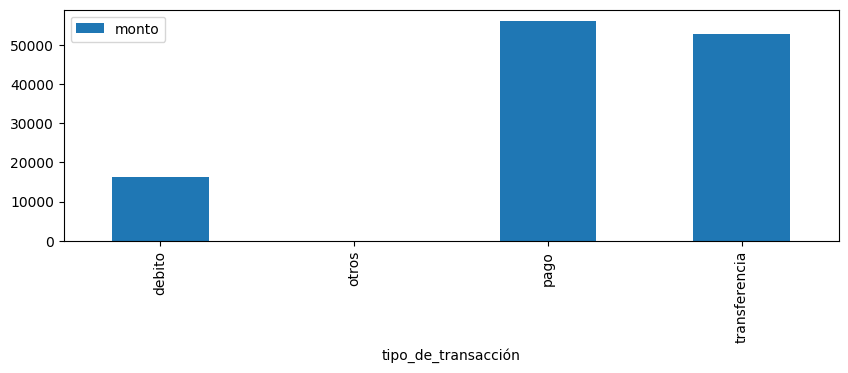

In [55]:
#grafico de barras de cantidad de operaciones para cada tipo de operacion
operaciones_short.groupby(['tipo_de_transacción']).sum().plot(kind='bar')

In [85]:
operaciones_por_cliente = operaciones[['cuenta_origen','tipo_de_transacción', 'monto']].groupby(['cuenta_origen']).describe()
operaciones_por_cliente

monto                                                           \
              count       mean          std       min         25%        50%   
cuenta_origen                                                                  
982563456       1.0   2345.330          NaN   2345.33   2345.3300   2345.330   
987656789       1.0   1100.100          NaN   1100.10   1100.1000   1100.100   
987876876       1.0    122.220          NaN    122.22    122.2200    122.220   
998766554       1.0   1800.000          NaN   1800.00   1800.0000   1800.000   
1111115467      1.0    500.500          NaN    500.50    500.5000    500.500   
1223344556      1.0   1800.000          NaN   1800.00   1800.0000   1800.000   
1231222223      2.0    945.115  1208.989961     90.23    517.6725    945.115   
1234567890      1.0   6200.000          NaN   6200.00   6200.0000   6200.000   
1252387690      1.0  34523.320          NaN  34523.32  34523.3200  34523.320   
1265656578      3.0    815.310   896.770664     45.50    322.9650    600.430   
1265879854      1.0    600.430          NaN    600.43    600.4300    600.430   
1762345234      1.0   3345.500          NaN   3345.50   3345.5000   3345.500   
1982342323      1.0   3465.650          NaN   3465.65   3465.6500   3465.650   
2121212121      3.0   4637.650  6493.921280     45.50    922.7500   1800.000   
2673451209      1.0    999.340          NaN    999.34    999.3400    999.340   
3456345129      1.0    345.560          NaN    345.56    345.5600    345.560   
3467891123      1.0     90.230          NaN     90.23     90.2300     90.230   
4567345987      1.0  45678.000          NaN  45678.00  45678.0000  45678.000   
6666453478      2.0     11.265    15.506852      0.30      5.7825     11.265   
6786784324      2.0    122.005     0.007071    122.00    122.0025    122.005   
7456453243      1.0   2100.500          NaN   2100.50   2100.5000   2100.500   
7777888880      1.0   1800.000          NaN   1800.00   1800.0000   1800.000   

                                     
                      75%       max  
cuenta_origen                        
982563456       2345.3300   2345.33  
987656789       1100.1000   1100.10  
987876876        122.2200    122.22  
998766554       1800.0000   1800.00  
1111115467       500.5000    500.50  
1223344556      1800.0000   1800.00  
1231222223      1372.5575   1800.00  
1234567890      6200.0000   6200.00  
1252387690     34523.3200  34523.32  
1265656578      1200.2150   1800.00  
1265879854       600.4300    600.43  
1762345234      3345.5000   3345.50  
1982342323      3465.6500   3465.65  
2121212121      6933.7250  12067.45  
2673451209       999.3400    999.34  
3456345129       345.5600    345.56  
3467891123        90.2300     90.23  
4567345987     45678.0000  45678.00  
6666453478        16.7475     22.23  
6786784324       122.0075    122.01  
7456453243      2100.5000   2100.50  
7777888880      1800.0000   1800.00

In [86]:
operaciones_por_cliente.columns = ['cantidad_de_operaciones', 'promedio_operacion','eliminar1', 'monto_minimo_operado','eli2','elim3','elim4','monto_maximo_operado']
operaciones_por_cliente

,cantidad_de_operaciones,promedio_operacion,eliminar1,monto_minimo_operado,eli2,elim3,elim4,monto_maximo_operado
cuenta_origen,,,,,,,,
982563456,1.0,2345.330,NaN,2345.33,2345.3300,2345.330,2345.3300,2345.33
987656789,1.0,1100.100,NaN,1100.10,1100.1000,1100.100,1100.1000,1100.10
987876876,1.0,122.220,NaN,122.22,122.2200,122.220,122.2200,122.22
998766554,1.0,1800.000,NaN,1800.00,1800.0000,1800.000,1800.0000,1800.00
1111115467,1.0,500.500,NaN,500.50,500.5000,500.500,500.5000,500.50
1223344556,1.0,1800.000,NaN,1800.00,1800.0000,1800.000,1800.0000,1800.00
1231222223,2.0,945.115,1208.989961,90.23,517.6725,945.115,1372.5575,1800.00
1234567890,1.0,6200.000,NaN,6200.00,6200.0000,6200.000,6200.0000,6200.00
1252387690,1.0,34523.320,NaN,34523.32,34523.3200,34523.320,34523.3200,34523.32


In [91]:
operaciones_por_cliente.drop( ['eliminar1','eli2','elim3','elim4'], axis=1, inplace = True)

In [141]:
operaciones_por_cliente.drop(['total_operado'],axis=1,inplace=True)
operaciones_por_cliente

,cantidad_de_operaciones,promedio_operacion,monto_minimo_operado,monto_maximo_operado
cuenta_origen,,,,
982563456,1.0,2345.330,2345.33,2345.33
987656789,1.0,1100.100,1100.10,1100.10
987876876,1.0,122.220,122.22,122.22
998766554,1.0,1800.000,1800.00,1800.00
1111115467,1.0,500.500,500.50,500.50
1223344556,1.0,1800.000,1800.00,1800.00
1231222223,2.0,945.115,90.23,1800.00
1234567890,1.0,6200.000,6200.00,6200.00
1252387690,1.0,34523.320,34523.32,34523.32


In [142]:
operaciones_por_cliente.sort_values(by='cantidad_de_operaciones',ascending = False).head(5)

,cantidad_de_operaciones,promedio_operacion,monto_minimo_operado,monto_maximo_operado
cuenta_origen,,,,
1265656578,3.0,815.310,45.50,1800.00
2121212121,3.0,4637.650,45.50,12067.45
6786784324,2.0,122.005,122.00,122.01
6666453478,2.0,11.265,0.30,22.23
1231222223,2.0,945.115,90.23,1800.00


In [143]:
operaciones_short_otro = operaciones [['cuenta_origen','monto']]
operaciones_short_otro

,cuenta_origen,monto
0,1234567890,6200.00
1,1762345234,3345.50
2,1982342323,3465.65
3,2121212121,12067.45
4,4567345987,45678.00
5,1252387690,34523.32
6,1265656578,600.43
7,1231222223,90.23
8,1265656578,1800.00
9,7456453243,2100.50


In [144]:
#suma todos los montos por cuenta
operaciones_short_new = operaciones_short_otro.groupby('cuenta_origen').agg({'monto':'sum'})
operaciones_short_new

,monto
cuenta_origen,
982563456,2345.33
987656789,1100.10
987876876,122.22
998766554,1800.00
1111115467,500.50
1223344556,1800.00
1231222223,1890.23
1234567890,6200.00
1252387690,34523.32


In [145]:
print(operaciones_por_cliente['cantidad_de_operaciones'].count()==(operaciones_short_new['monto'].count()))

True


In [146]:
operaciones_short_new.columns = ['monto_acumulado']
operaciones_short_new

,monto_acumulado
cuenta_origen,
982563456,2345.33
987656789,1100.10
987876876,122.22
998766554,1800.00
1111115467,500.50
1223344556,1800.00
1231222223,1890.23
1234567890,6200.00
1252387690,34523.32


In [148]:
operaciones_por_clientes_final = operaciones_por_cliente.merge(operaciones_short_new,left_index=True, right_index=True)
operaciones_por_clientes_final

,cantidad_de_operaciones,promedio_operacion,monto_minimo_operado,monto_maximo_operado,monto_acumulado
cuenta_origen,,,,,
982563456,1.0,2345.330,2345.33,2345.33,2345.33
987656789,1.0,1100.100,1100.10,1100.10,1100.10
987876876,1.0,122.220,122.22,122.22,122.22
998766554,1.0,1800.000,1800.00,1800.00,1800.00
1111115467,1.0,500.500,500.50,500.50,500.50
1223344556,1.0,1800.000,1800.00,1800.00,1800.00
1231222223,2.0,945.115,90.23,1800.00,1890.23
1234567890,1.0,6200.000,6200.00,6200.00,6200.00
1252387690,1.0,34523.320,34523.32,34523.32,34523.32


In [150]:
#muestra las 5 cuentas con mayor monto_acumulado
operaciones_por_clientes_final.sort_values(by='monto_acumulado',ascending = False).head(5)

,cantidad_de_operaciones,promedio_operacion,monto_minimo_operado,monto_maximo_operado,monto_acumulado
cuenta_origen,,,,,
4567345987,1.0,45678.00,45678.00,45678.00,45678.00
1252387690,1.0,34523.32,34523.32,34523.32,34523.32
2121212121,3.0,4637.65,45.50,12067.45,13912.95
1234567890,1.0,6200.00,6200.00,6200.00,6200.00
1982342323,1.0,3465.65,3465.65,3465.65,3465.65


In [156]:
#imprime los 5 montos mayores de debitos, que es el que mayor promedio de monto tiene.
debitos.sort_values('monto', ascending =False)

,nro_de_transacción,tipo_de_transacción,cuenta_origen,cuenta_destino,fecha,hora,monto
3,109456,debito,2121212121,7689565758,17/08/2019,11:31,12067.45
1,46759,debito,1762345234,909873452,17/08/2019,10:35,3345.50
6,908745,debito,1265656578,9367458354,22/11/2019,10:35,600.43
7,152431,debito,1231222223,2783523412,03/03/2018,11:20,90.23
18,783333,debito,3467891123,3467891123,01/09/2018,22:06,90.23
13,909091,debito,2121212121,9090878765,17/08/2019,18:43,45.50


In [159]:
debitos = debitos.set_index('nro_de_transacción')
debitos

,tipo_de_transacción,cuenta_origen,cuenta_destino,fecha,hora,monto
nro_de_transacción,,,,,,
46759,debito,1762345234,909873452,17/08/2019,10:35,3345.50
109456,debito,2121212121,7689565758,17/08/2019,11:31,12067.45
908745,debito,1265656578,9367458354,22/11/2019,10:35,600.43
152431,debito,1231222223,2783523412,03/03/2018,11:20,90.23
909091,debito,2121212121,9090878765,17/08/2019,18:43,45.50
783333,debito,3467891123,3467891123,01/09/2018,22:06,90.23


In [161]:
debitos_short = debitos['monto']
debitos_short.sort_values('monto', ascending =False).plot(kind='bar')

ValueError: No axis named monto for object type <class 'pandas.core.series.Series'>